[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


📁 Upload your Churn CSV file...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv
✅ File uploaded successfully: Telco-Customer-Churn (1).csv


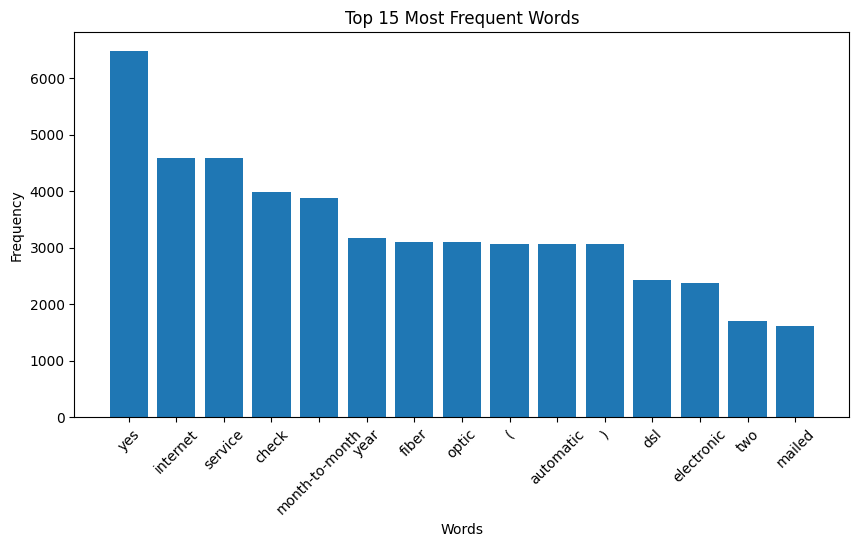

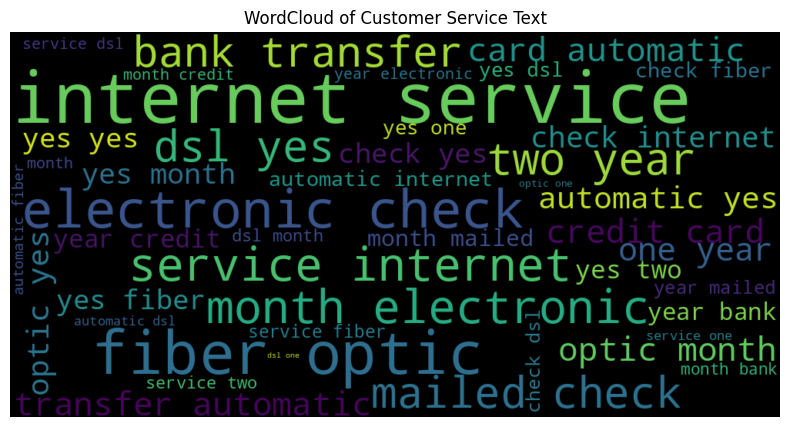


Sample Clean Text:
0                  dsl month-to-month electronic check
1                    dsl yes one year mailed check yes
2                  dsl yes month-to-month mailed check
3    dsl yes yes one year bank transfer ( automatic...
4          fiber optic month-to-month electronic check
Name: clean_text, dtype: object

TF-IDF Feature Matrix Preview:
   automatic      bank  card     check  credit       dsl  electronic  \
0   0.000000  0.000000   0.0  0.321603     0.0  0.423153    0.427940   
1   0.000000  0.000000   0.0  0.272698     0.0  0.358806    0.000000   
2   0.000000  0.000000   0.0  0.295620     0.0  0.388965    0.000000   
3   0.249688  0.343167   0.0  0.000000     0.0  0.281877    0.000000   
4   0.000000  0.000000   0.0  0.306782     0.0  0.000000    0.408218   

      fiber  internet    mailed     month       one     optic  service  \
0  0.000000       0.0  0.000000  0.653838  0.000000  0.000000      0.0   
1  0.000000       0.0  0.429349  0.000000  0.444987  0.00000

In [3]:
#===========================================================
# Assignment 11 – NLP Preprocessing for Customer Churn Project
# Tokenization | Stopword Removal | TF-IDF | Graphs
# With File Upload + NLTK Fixes (Error-Free)
#===========================================================

# Install required libraries
!pip install nltk matplotlib scikit-learn pandas wordcloud

# Imports
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
from google.colab import files

#--------------------------------------------
# NLTK FIX (IMPORTANT)
#--------------------------------------------
nltk.download('punkt')
nltk.download('punkt_tab')   # FIX for new NLTK tokenizer error
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')  # backup tokenizer support

#--------------------------------------------
# 1. Upload your dataset
#--------------------------------------------
print("📁 Upload your Churn CSV file...")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("✅ File uploaded successfully:", file_name)

#--------------------------------------------
# 2. Combine text-like features into one document
#--------------------------------------------
text_cols = ['InternetService', 'OnlineSecurity', 'TechSupport',
             'Contract', 'PaymentMethod', 'DeviceProtection']

df['customer_text'] = df[text_cols].astype(str).agg(' '.join, axis=1)

#--------------------------------------------
# 3. Tokenization (error-free)
#--------------------------------------------
def safe_tokenize(text):
    try:
        return word_tokenize(text.lower())
    except:
        return text.lower().split()  # backup tokenizer

df['tokens'] = df['customer_text'].apply(safe_tokenize)

#--------------------------------------------
# 4. Stopword Removal
#--------------------------------------------
stop_words = set(stopwords.words('english'))
df['clean_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

#--------------------------------------------
# 5. Convert tokens back to clean text
#--------------------------------------------
df['clean_text'] = df['clean_tokens'].apply(lambda x: " ".join(x))

#--------------------------------------------
# 6. TF-IDF Vectorization (Top 50 features)
#--------------------------------------------
tfidf = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

#--------------------------------------------
# 7. Bar Graph – Most Frequent Words
#--------------------------------------------
all_words = [w for tokens in df['clean_tokens'] for w in tokens]
word_freq = Counter(all_words).most_common(15)

words = [w for w, c in word_freq]
counts = [c for w, c in word_freq]

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Top 15 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

#--------------------------------------------
# 8. WordCloud Visualization
#--------------------------------------------
wordcloud_text = " ".join(all_words)

plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=1000, height=500).generate(wordcloud_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Customer Service Text")
plt.show()

#--------------------------------------------
# 9. Output Preview
#--------------------------------------------
print("\nSample Clean Text:")
print(df['clean_text'].head())

print("\nTF-IDF Feature Matrix Preview:")
print(tfidf_df.head())
